In [13]:
#import
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#create infor
data = np.array([1, 0, 0, 1,1,1, 0,1])

bit_duration = 1
freq = 5/bit_duration  # carrier frequency
samples_per_bit = 200
n_samples = data.size * samples_per_bit 

time = np.linspace(0, data.size, n_samples)

In [15]:
#binary seq
bnr_seq = np.repeat(data, samples_per_bit)
# carry signal
carry_signal = np.cos(2*np.pi * freq * time)
#psk modulation
phase = np.pi + np.pi*bnr_seq # +180degree if 0 else +360deg
psk = np.cos(2*np.pi * freq * time + phase)


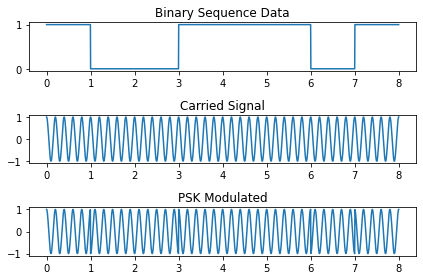

In [16]:
#plot 
plt.subplot(3, 1, 1)
plt.plot(time, bnr_seq)
plt.title("Binary Sequence Data")

plt.subplot(3, 1, 2)
plt.plot(time, carry_signal)
plt.title("Carried Signal")


plt.subplot(3, 1, 3)
plt.plot(time, psk)
plt.title("PSK Modulated")

plt.tight_layout()
plt.show()

In [17]:
demodulated = []

for i in range(int(time.size/samples_per_bit)):
    y = i*samples_per_bit+1
    if psk[y]*carry_signal[y] >= 0:
        demodulated.append(1)
    else: 
        demodulated.append(0)

result = np.asarray(demodulated) #convert array to numpy array

print('input data :',data)
print('demodulated:',result)

result = np.repeat(result,samples_per_bit) 

input data : [1 0 0 1 1 1 0 1]
demodulated: [1 0 0 1 1 1 0 1]


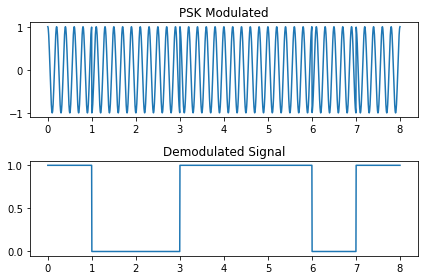

In [18]:
plt.subplot(2, 1, 1)
plt.plot(time, psk)
plt.title("PSK Modulated")

plt.subplot(2, 1, 2)
plt.plot(time, result)
plt.title("Demodulated Signal")

plt.tight_layout()
plt.show()